# DECISION TREE

Untuk mengimplementasikan Decision Tree, kita akan menggunakan Dataset Bunga Iris yang sangat terkenal yang terdiri dari 3 kelas bunga. Dalam hal ini, ada 4 variabel independen yaitu, sepal_length , sepal_width , petal_length dan petal_width . Variabel dependen adalah spesies yang akan kita perkirakan dengan menggunakan empat fitur independen bunga.

# IMPORT LIBRARY

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MELIHAT DATA MENGGUNAKAN PANDAS

In [20]:
df=pd.read_csv('https://raw.githubusercontent.com/LuluatulMaknunah21-048/Pendata/main/IrisDataset.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# MELIHAT BANYAK DATA PERKELAS

In [21]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# MELIHAT DATA MISSING VALUE PADA DATA

In [22]:
# Missing Value in Variabel
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [23]:
# Declare feature vector and target variable
X = df.drop(['species'], axis=1)
y = df['species']

# MEMISAHKAN DATA LATIH DAN DATA TRAINING

In [24]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [25]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [26]:
# check data types in X_train
X_train.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [27]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
41,4.5,2.3,1.3,0.3
131,7.9,3.8,6.4,2.0
70,5.9,3.2,4.8,1.8
46,5.1,3.8,1.6,0.2
126,6.2,2.8,4.8,1.8


In [28]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
92,5.8,2.6,4.0,1.2
44,5.1,3.8,1.9,0.4
7,5.0,3.4,1.5,0.2
21,5.1,3.7,1.5,0.4
95,5.7,3.0,4.2,1.2


# IMPORT LIBRARY DECISION CLASSIFIER

In [29]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=21)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=21)

In [31]:
y_pred_gini = clf_gini.predict(X_test)

# MELIHAT AKURASI

In [32]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.93


In [33]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'versi

In [34]:
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.99


In [35]:
# print the scores on training and test set
print('Training set score: {:.2f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.99
Test set score: 0.93


# MENAMPILKAN TREE

[Text(0.4, 0.875, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [39, 38, 43]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.625, 'X[2] <= 4.95\ngini = 0.498\nsamples = 81\nvalue = [0, 38, 43]'),
 Text(0.4, 0.375, 'X[3] <= 1.65\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.6, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]')]

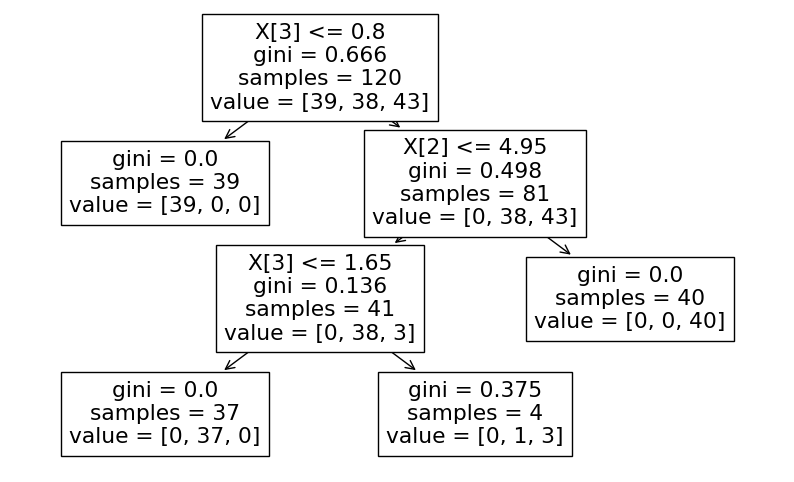

In [36]:
plt.figure(figsize=(10,6))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 